### The goal of this notebook is to show how the transcript similarity was computed 
- Inspired by code from here: https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder
- Note: the transcripts are available in the data folder for Fig. 6

In [14]:
import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
trans_dir = '../../data/fig_3_USE_event_boundaries/_all_narr_files/'

nums = list(range(103,118))+list(range(119,121)) + list(range(122,131))+ list(range(132,137))+ list(range(138,139)) + list(range(140,141))+list(range(142,143)) + list(range(145,152))+ list(range(153,154)) + list(range(155,156))                                                                         


## Define functions

In [19]:
def get_clean_transcript_USE(transcript): 

    with open(transcript, 'r') as text:
        textfile = text.read()
        length=(len(textfile))
        transcript_loc = [m.start() for m in re.finditer('transcript', textfile)]
        empty_string = ""

        for i in range(len(transcript_loc)):
            quote_loc = [m.start() for m in re.finditer('"', (textfile[transcript_loc[i]:length]))]
            new = (textfile[(transcript_loc[i]+quote_loc[0]):(transcript_loc[i]+quote_loc[2])])
            empty_string = empty_string + new
        empty_string = empty_string.replace(':', '')
        empty_string = empty_string.replace('"', '')

    return empty_string

def plot_similarity_modified(labels, features, rotation,title):
    corr = cosine_similarity(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd",cbar_kws={'label': 'cosine similarity'})
    g.set_xticklabels(labels, rotation=rotation)
    plt.gcf().subplots_adjust(bottom=0.15)    
    
def run_and_plot_modified_USE(messages_,ML_lab,title,plot):
    message_embeddings_ = embed(messages_)
    if plot == True:
        plot_similarity_modified(ML_lab, message_embeddings_, 90,title)
    return message_embeddings_


def embed(input):
    return model(input)





In [10]:
mov = 'Growth'
plot=True

MISSING: 107 Growth
Cleaning up the transcript
[4]
Removing the missing subject and plotting


Text(26.5, 0.5, 'Subjects')

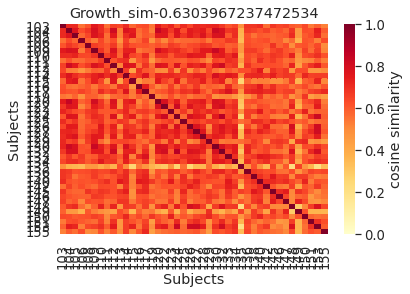

In [20]:
trans = []
for sub in nums: 
    if os.path.exists(trans_dir + 'NSD%s_%s_Narr_clean.txt' %(sub, mov)):
        transcript = trans_dir + 'NSD%s_%s_Narr_clean.txt' %(sub, mov)
        with open(transcript) as f:
            lines = f.readlines()
        try:
            starts = [lines.index(l) for l in lines if l.startswith('Speaker 1')]
            transcript = lines[starts[0]]
            transcript = transcript.replace('Speaker 1:\t','')
        except:
            transcript = lines[2]
            #did this because Speaker 1 was removed
        transcript = transcript.replace('\x97',' ')
        transcript = transcript.replace('--','')
        transcript = transcript.replace('.\n','')

    elif os.path.exists(trans_dir + 'NSD%s_%s_Narr.txt' %(sub, mov)):
        transcript = trans_dir + 'NSD%s_%s_Narr.txt' %(sub, mov)
        with open(transcript) as f:
            lines = f.readlines()
        try:
            starts = [lines.index(l) for l in lines if l.startswith('Speaker 1')]
            transcript = lines[starts[0]]
            transcript = transcript.replace('Speaker 1:\t','')
        except:
            transcript = lines[2]
        transcript = transcript.replace('\x97',' ')
        transcript = transcript.replace('--','')
        transcript = transcript.replace('.\n','')


    else:
        print('MISSING:', sub, mov)
        transcript = []

    trans.append(transcript)

''' Clean the missing transcript '''
print('Cleaning up the transcript')
idx_missing_list = []
for idx,j in enumerate(trans):
    if j == []:

        idx_missing_list.append(idx)
print(idx_missing_list)


print('Removing the missing subject and plotting')
nums_short = nums.copy()
trans_short = trans.copy()
for val in range(len(idx_missing_list)):
    idx_missing = trans_short.index([])
    trans_short.pop(idx_missing) #this should get rid of the right ones!
    nums_short.pop(idx_missing)
vector = run_and_plot_modified_USE(trans_short,nums_short,None,plot)
corr = cosine_similarity(vector, vector)
low_t_inds = np.tril_indices(corr.shape[0], k=-1)
first = np.median(corr[low_t_inds])
plt.title(f'{mov}_sim-{first}')
plt.xlabel('Subjects')
plt.ylabel('Subjects')
